In [1]:
import numpy as np
import matplotlib.pyplot as plt

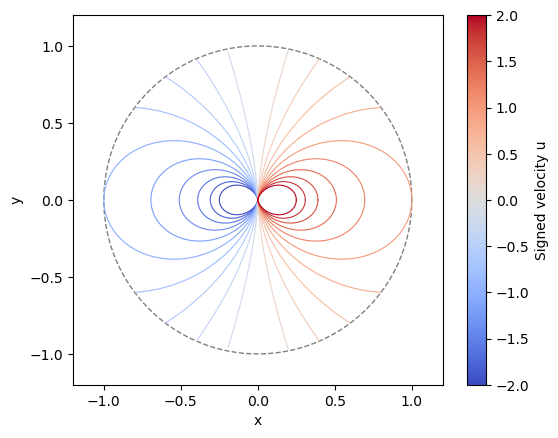

In [2]:
# Initialise signed u values
u_values = np.arange(-2.0, 2.1, 0.2)  # from -2 to +2
phi = np.linspace(0, 2 * np.pi, 2000)

# Unit circle
unit_circle_phi = np.linspace(0, 2 * np.pi, 500)
circle_x = np.cos(unit_circle_phi)
circle_y = np.sin(unit_circle_phi)

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.grid(False)

# Plot the unit circle outline
ax.plot(circle_x, circle_y, color='grey', linestyle='--', linewidth=1)

# Colourmap
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=-2.0, vmax=2.0)

# Plot level curves with colour indicating signed velocity
for u in u_values:
    if u == 0:
        continue  # avoid division by zero

    r_prime = (np.cos(phi) / u) ** 2
    cos_phi = np.cos(phi)

    x = []
    y = []

    for idx in range(len(phi)):
        # Only plot if r' <= 1 AND cos(phi) and u have same sign
        if r_prime[idx] <= 1 and np.sign(cos_phi[idx]) == np.sign(u):
            x.append(r_prime[idx] * np.cos(phi[idx]))
            y.append(r_prime[idx] * np.sin(phi[idx]))
        else:
            x.append(np.nan)
            y.append(np.nan)

    color = cmap(norm(u))
    ax.plot(x, y, color=color, linewidth=0.8)

# Add colourbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Signed velocity u')
plt.show()